In [1]:
# imports
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
data = pd.read_csv('DS22.csv')
print('Training data shape: ', data.shape)
data.head()

Training data shape:  (3441356, 73)


,Unnamed: 0,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,...,work_type_62,work_type_63,work_type_64,work_type_65,work_type_66,ticket_datetime,elevation_height,slope_geo_delta_0.0003,is_large_project,has_damage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-01-02,264,0.012744,False,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2015-01-02,289,0.012622,False,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-01-02,292,0.012429,False,0
3,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2015-01-02,207,0.012475,False,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015-01-02,248,0.012572,False,0


#### Data Exploration

In [3]:
# read target
data['has_damage'].value_counts()

0    3433916
1       7440
Name: has_damage, dtype: int64

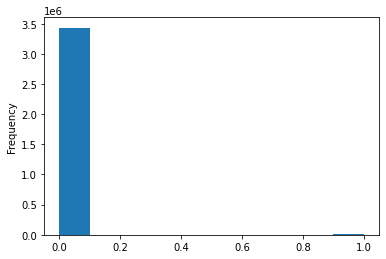

In [4]:
data['has_damage'].astype(int).plot.hist();

From this information, we see this is an imbalanced class problem. There are only a fewer examples where a damage occured

#### Examin Missing Values

In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 73 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Column Types

In [8]:
# Number of each type of column
data.dtypes.value_counts()

int64      70
object      1
float64     1
bool        1
dtype: int64

In [9]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ticket_datetime    94852
dtype: int64

In [11]:
(data['elevation_height']).describe()

count    3.441356e+06
mean     2.569258e+02
std      1.186286e+02
min     -5.224000e+03
25%      2.230000e+02
50%      2.570000e+02
75%      2.880000e+02
max      1.812000e+03
Name: elevation_height, dtype: float64

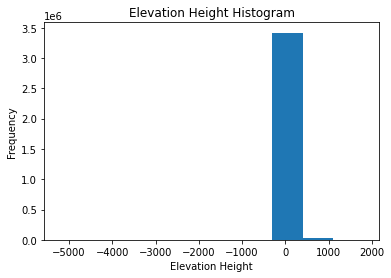

In [12]:
data['elevation_height'].plot.hist(title = 'Elevation Height Histogram');
plt.xlabel('Elevation Height');

In [13]:
(data['slope_geo_delta_0.0003']).describe()

count    3.441356e+06
mean     9.274215e-03
std      1.972853e-02
min      0.000000e+00
25%      4.957381e-03
50%      7.704585e-03
75%      1.087177e-02
max      4.067290e-01
Name: slope_geo_delta_0.0003, dtype: float64

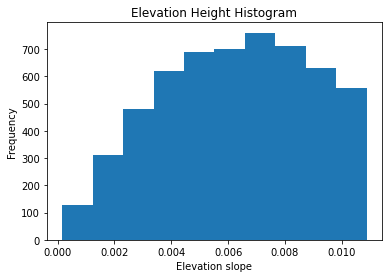

In [18]:
data[(data['slope_geo_delta_0.0003'] <= 1.087177e-02) &  (data['has_damage'] == 1)]['slope_geo_delta_0.0003'].plot.hist(title = 'Elevation Height Histogram');
plt.xlabel('Elevation slope');

In [19]:
print('Negative slope_geo_delta_0.0003',data[data['slope_geo_delta_0.0003'] <= 0].shape[0])
print('Zero slope_geo_delta_0.0003',data[data['slope_geo_delta_0.0003'] == 0].shape[0])
print('Negative slope_geo_delta_0.0003',data[data['slope_geo_delta_0.0003'] <= 0].shape[0])
print('Zero slope_geo_delta_0.0003',data[data['slope_geo_delta_0.0003'] == 0].shape[0])

Negative slope_geo_delta_0.0003 28
Zero slope_geo_delta_0.0003 28
Negative slope_geo_delta_0.0003 28
Zero slope_geo_delta_0.0003 28


In [20]:
print('Negative Elevation',data[data['elevation_height'] <= 0].shape[0])
print('Zero Elevation',data[data['elevation_height'] == 0].shape[0])
print('Elevation above 0 and less than 1000',data[(data['elevation_height'] > 0) & (data['elevation_height'] < 1000)].shape[0])
print('Elevation above 1000',data[data['elevation_height'] >= 1000].shape[0])

Negative Elevation 1513
Zero Elevation 2
Elevation above 0 and less than 1000 3439826
Elevation above 1000 17


### Deriving New Columsn from existing columns

In [21]:
import math
data['elevation_angle'] =[math.degrees(math.atan(row['slope_geo_delta_0.0003'])) for index,row in data.iterrows() ]

In [22]:
data.head(10)

,Unnamed: 0,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,...,work_type_63,work_type_64,work_type_65,work_type_66,ticket_datetime,elevation_height,slope_geo_delta_0.0003,is_large_project,has_damage,elevation_angle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,264,0.012744,False,0,0.730140
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2015-01-02,289,0.012622,False,0,0.723141
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,292,0.012429,False,0,0.712104
3,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2015-01-02,207,0.012475,False,0,0.714744
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,248,0.012572,False,0,0.720301
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,214,0.012694,False,0,0.727252
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,287,0.012146,False,0,0.695857
7,7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2015-01-02,350,0.011882,False,0,0.680729
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2015-01-02,333,0.011877,False,0,0.680444
9,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2015-01-02,260,0.010885,False,0,0.623622


In [24]:
(data['elevation_angle']).describe()

count    3.441356e+06
mean     5.289359e-01
std      1.087952e+00
min      0.000000e+00
25%      2.840347e-01
50%      4.414315e-01
75%      6.228818e-01
max      2.213300e+01
Name: elevation_angle, dtype: float64

These angles do not provide any information

#### Correlations

In [25]:
correlations = data.corr()['has_damage'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 work_type_16        0.002632
work_type_25        0.002635
work_type_51        0.002802
work_type_23        0.003270
work_type_41        0.004100
work_type_9         0.004542
work_type_10        0.005801
Unnamed: 0          0.009521
work_type_8         0.011105
work_type_56        0.012731
work_type_12        0.013272
work_type_55        0.027471
is_large_project    0.027604
work_type_66        0.034194
has_damage          1.000000
Name: has_damage, dtype: float64

Most Negative Correlations:
 work_type_6        -0.015570
work_type_64       -0.013425
work_type_54       -0.008034
work_type_22       -0.006876
work_type_61       -0.006708
work_type_58       -0.006327
work_type_57       -0.005917
work_type_34       -0.005653
work_type_42       -0.005138
work_type_45       -0.004114
elevation_height   -0.003025
work_type_18       -0.002943
work_type_0        -0.001883
work_type_47       -0.001721
work_type_48       -0.001623
Name: has_damage, dtype: float64


work_type_66 ,is_large_project,work_type_55 have a large correlation

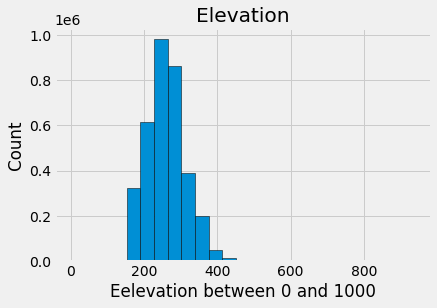

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data[(data['elevation_height'] > 0) & (data['elevation_height'] < 1000)]['elevation_height'], edgecolor = 'k', bins = 25)
plt.title('Elevation'); plt.xlabel('Eelevation between 0 and 1000'); plt.ylabel('Count');

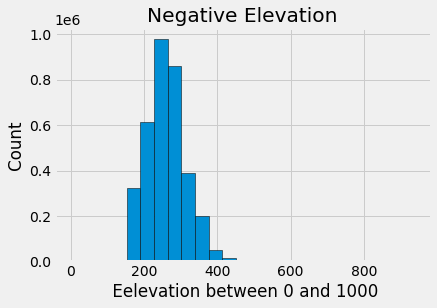

In [27]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data[(data['elevation_height'] > 0) & (data['elevation_height'] < 1000) & (data['has_damage'] == 0)]['elevation_height'], edgecolor = 'k', bins = 25)
plt.title('Negative Elevation'); plt.xlabel(' Eelevation between 0 and 1000'); plt.ylabel('Count');

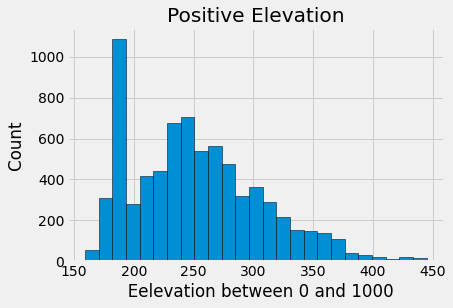

In [28]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data[(data['elevation_height'] > 0) & (data['elevation_height'] < 1000) & (data['has_damage'] == 1)]['elevation_height'], edgecolor = 'k', bins = 25)
plt.title('Positive Elevation'); plt.xlabel('  Eelevation between 0 and 1000'); plt.ylabel('Count');

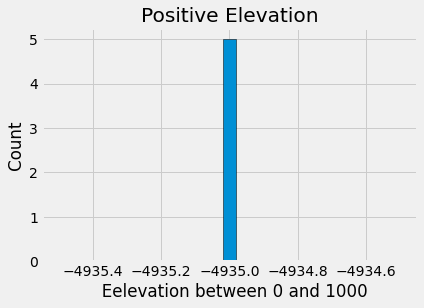

In [29]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data[(data['elevation_height'] < 0)  & (data['has_damage'] == 1)]['elevation_height'], edgecolor = 'k', bins = 25)
plt.title('Positive Elevation'); plt.xlabel('  Eelevation between 0 and 1000'); plt.ylabel('Count');

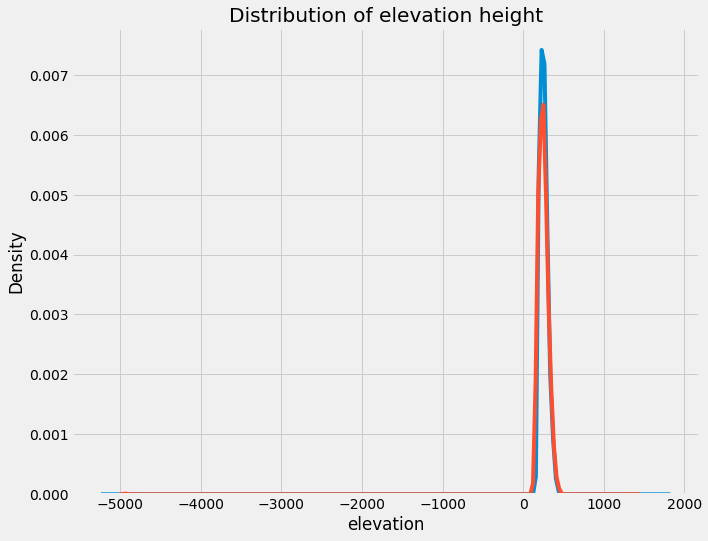

In [30]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['has_damage'] == 0, 'elevation_height'], label = 'has_damage == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['has_damage'] == 1, 'elevation_height'], label = 'has_damage == 1')

# Labeling of plot
plt.xlabel('elevation'); plt.ylabel('Density'); plt.title('Distribution of elevation height');

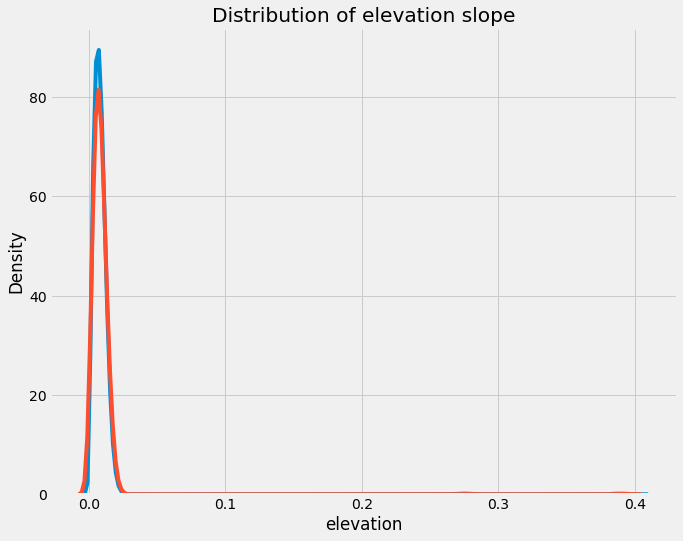

In [31]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['has_damage'] == 0, 'slope_geo_delta_0.0003'], label = 'has_damage == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['has_damage'] == 1, 'slope_geo_delta_0.0003'], label = 'has_damage == 1')

# Labeling of plot
plt.xlabel('elevation'); plt.ylabel('Density'); plt.title('Distribution of elevation slope');

In [60]:
## Binning based on elevation

elevation_data = data[['has_damage', 'elevation_height']]

# Bin the age data
elevation_data['ELEVATION_BINNED'] = pd.cut(elevation_data['elevation_height'], bins = np.linspace(-5.224000e+03, 1.812000e+03, num = 15))
elevation_data.head(10)

,has_damage,elevation_height,ELEVATION_BINNED
0,0,264,"(-198.286, 304.286]"
1,0,289,"(-198.286, 304.286]"
2,0,292,"(-198.286, 304.286]"
3,0,207,"(-198.286, 304.286]"
4,0,248,"(-198.286, 304.286]"
5,0,214,"(-198.286, 304.286]"
6,0,287,"(-198.286, 304.286]"
7,0,350,"(304.286, 806.857]"
8,0,333,"(304.286, 806.857]"
9,0,260,"(-198.286, 304.286]"


In [92]:
elevation_data.ELEVATION_BINNED.unique()

array([Interval(-198.286, 304.286, closed='right'),
       Interval(304.286, 806.857, closed='right'),
       Interval(-5224.0, -4721.429, closed='right'), nan,
       Interval(-2208.571, -1706.0, closed='right'),
       Interval(1309.429, 1812.0, closed='right'),
       Interval(806.857, 1309.429, closed='right'),
       Interval(-700.857, -198.286, closed='right'),
       Interval(-2711.143, -2208.571, closed='right'),
       Interval(-4721.429, -4218.857, closed='right'),
       Interval(-3716.286, -3213.714, closed='right'),
       Interval(-1203.429, -700.857, closed='right'),
       Interval(-1706.0, -1203.429, closed='right'),
       Interval(-3213.714, -2711.143, closed='right')], dtype=object)

In [54]:
# Group by the bin and calculate averages
elevation_group = elevation_data.groupby('ELEVATION_BINNED').mean()
elevation_group

,has_damage,elevation_height
ELEVATION_BINNED,,
"(-5224.0, -4721.429]",0.003434,-4934.977335
"(-4721.429, -4218.857]",0.000000,-4620.750000
"(-4218.857, -3716.286]",NaN,NaN
"(-3716.286, -3213.714]",0.000000,-3682.500000
"(-3213.714, -2711.143]",0.000000,-3041.000000
"(-2711.143, -2208.571]",0.000000,-2535.666667
"(-2208.571, -1706.0]",0.000000,-1754.000000
"(-1706.0, -1203.429]",0.000000,-1413.000000
"(-1203.429, -700.857]",0.000000,-811.000000


In [55]:
elevation_data.groupby(['ELEVATION_BINNED','has_damage']).count()

elevation_height
ELEVATION_BINNED       has_damage                  
(-5224.0, -4721.429]   0                       1451
                       1                          5
(-4721.429, -4218.857] 0                          4
                       1                          0
(-4218.857, -3716.286] 0                          0
                       1                          0
(-3716.286, -3213.714] 0                          2
                       1                          0
(-3213.714, -2711.143] 0                          1
                       1                          0
(-2711.143, -2208.571] 0                          6
                       1                          0
(-2208.571, -1706.0]   0                          1
                       1                          0
(-1706.0, -1203.429]   0                          1
                       1                          0
(-1203.429, -700.857]  0                          1
                       1                          0
(-700.857, -198.286]   0                         20
                       1                          0
(-198.286, 304.286]    0                    2837682
                       1                       6143
(304.286, 806.857]     0                     594720
                       1                       1291
(806.857, 1309.429]    0                         15
                       1                          0
(1309.429, 1812.0]     0                         11
                       1                          1

In [56]:
elevation_data.head(5)

,has_damage,elevation_height,ELEVATION_BINNED
0,0,264,"(-198.286, 304.286]"
1,0,289,"(-198.286, 304.286]"
2,0,292,"(-198.286, 304.286]"
3,0,207,"(-198.286, 304.286]"
4,0,248,"(-198.286, 304.286]"


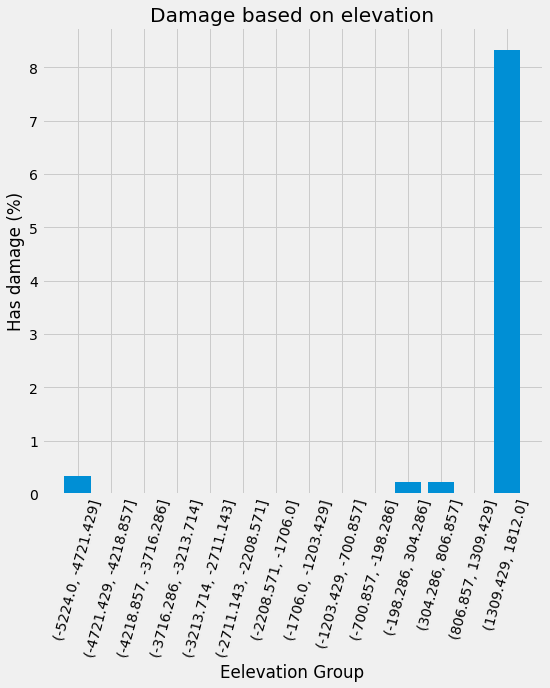

In [116]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(elevation_group.index.astype(str), 100 * elevation_group['has_damage'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Eelevation Group'); plt.ylabel('Has damage (%)')
plt.title('Damage based on elevation');

#### Label Encoding and One-Hot Encoding

In [61]:
elevation_data['ELEVATION_BINNED'] = elevation_data['ELEVATION_BINNED'].astype(object)

In [66]:
elevation_height_one_hot = pd.get_dummies(elevation_data['ELEVATION_BINNED'])

In [99]:
elevation_height_one_hot_columns = elevation_height_one_hot.columns
len(elevation_height_one_hot_columns)

13

In [100]:
elevation_height_one_hot.columns =['elevation_height_range0',
'elevation_height_range1',
'elevation_height_range2',
'elevation_height_range3',
'elevation_height_range4',
'elevation_height_range5',
'elevation_height_range6',
'elevation_height_range7',
'elevation_height_range8',
'elevation_height_range9',
'elevation_height_range10',
'elevation_height_range11',
'elevation_height_range12'
     ]
elevation_height_one_hot.head(3)

,elevation_height_range0,elevation_height_range1,elevation_height_range2,elevation_height_range3,elevation_height_range4,elevation_height_range5,elevation_height_range6,elevation_height_range7,elevation_height_range8,elevation_height_range9,elevation_height_range10,elevation_height_range11,elevation_height_range12
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0


In [140]:
data_final = data.copy()

In [141]:
data_final.columns

Index(['Unnamed: 0', 'work_type_0', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'work_type_5', 'work_type_6',
       'work_type_7', 'work_type_8', 'work_type_9', 'work_type_10',
       'work_type_11', 'work_type_12', 'work_type_13', 'work_type_14',
       'work_type_15', 'work_type_16', 'work_type_17', 'work_type_18',
       'work_type_19', 'work_type_20', 'work_type_21', 'work_type_22',
       'work_type_23', 'work_type_24', 'work_type_25', 'work_type_26',
       'work_type_27', 'work_type_28', 'work_type_29', 'work_type_30',
       'work_type_31', 'work_type_32', 'work_type_33', 'work_type_34',
       'work_type_35', 'work_type_36', 'work_type_37', 'work_type_38',
       'work_type_39', 'work_type_40', 'work_type_41', 'work_type_42',
       'work_type_43', 'work_type_44', 'work_type_45', 'work_type_46',
       'work_type_47', 'work_type_48', 'work_type_49', 'work_type_50',
       'work_type_51', 'work_type_52', 'work_type_53', 'work_type_54',
       'work_type_

In [142]:
data_final = data_final.drop(columns = ['Unnamed: 0'])

In [143]:
for col in elevation_height_one_hot.columns:
    data_final[col] = elevation_height_one_hot[col]
data_final.shape

(3441356, 86)

In [130]:
data_final.head(3)

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,work_type_9,...,elevation_height_range3,elevation_height_range4,elevation_height_range5,elevation_height_range6,elevation_height_range7,elevation_height_range8,elevation_height_range9,elevation_height_range10,elevation_height_range11,elevation_height_range12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
elevation_slope_data = data[['has_damage', 'slope_geo_delta_0.0003']]
# Bin the age data
elevation_slope_data['ELEVATION_SLOPE_BINNED'] = pd.cut(elevation_slope_data['slope_geo_delta_0.0003'], bins = np.linspace(0,4.067290e-01, num = 15))
elevation_slope_data.head(10)

,has_damage,slope_geo_delta_0.0003,ELEVATION_SLOPE_BINNED
0,0,0.012744,"(0.0, 0.0291]"
1,0,0.012622,"(0.0, 0.0291]"
2,0,0.012429,"(0.0, 0.0291]"
3,0,0.012475,"(0.0, 0.0291]"
4,0,0.012572,"(0.0, 0.0291]"
5,0,0.012694,"(0.0, 0.0291]"
6,0,0.012146,"(0.0, 0.0291]"
7,0,0.011882,"(0.0, 0.0291]"
8,0,0.011877,"(0.0, 0.0291]"
9,0,0.010885,"(0.0, 0.0291]"


In [118]:
## Binning based on elevation

elevation_slope_data = data[['has_damage', 'slope_geo_delta_0.0003']]

# Bin the age data
elevation_slope_data['ELEVATION_SLOPE_BINNED'] = pd.cut(elevation_slope_data['slope_geo_delta_0.0003'], bins = np.linspace(0,4.067290e-01, num = 15))
elevation_slope_data.head(10)

,has_damage,slope_geo_delta_0.0003,ELEVATION_SLOPE_BINNED
0,0,0.012744,"(0.0, 0.0291]"
1,0,0.012622,"(0.0, 0.0291]"
2,0,0.012429,"(0.0, 0.0291]"
3,0,0.012475,"(0.0, 0.0291]"
4,0,0.012572,"(0.0, 0.0291]"
5,0,0.012694,"(0.0, 0.0291]"
6,0,0.012146,"(0.0, 0.0291]"
7,0,0.011882,"(0.0, 0.0291]"
8,0,0.011877,"(0.0, 0.0291]"
9,0,0.010885,"(0.0, 0.0291]"


In [119]:
# Group by the bin and calculate averages
elevation_slope_group = elevation_slope_data.groupby('ELEVATION_SLOPE_BINNED').mean()
elevation_group

,has_damage,elevation_height
ELEVATION_BINNED,,
"(-5224.0, -4721.429]",0.003434,-4934.977335
"(-4721.429, -4218.857]",0.000000,-4620.750000
"(-4218.857, -3716.286]",NaN,NaN
"(-3716.286, -3213.714]",0.000000,-3682.500000
"(-3213.714, -2711.143]",0.000000,-3041.000000
"(-2711.143, -2208.571]",0.000000,-2535.666667
"(-2208.571, -1706.0]",0.000000,-1754.000000
"(-1706.0, -1203.429]",0.000000,-1413.000000
"(-1203.429, -700.857]",0.000000,-811.000000


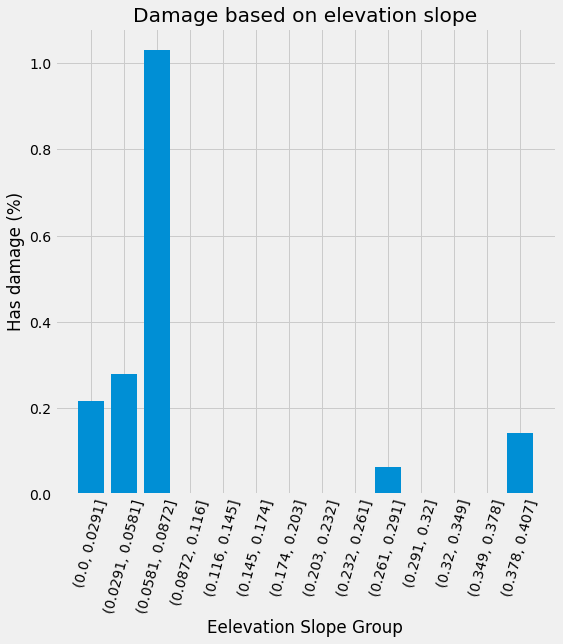

In [120]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(elevation_slope_group.index.astype(str), 100 * elevation_slope_group['has_damage'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Eelevation Slope Group'); plt.ylabel('Has damage (%)')
plt.title('Damage based on elevation slope');

In [109]:
elevation_slope_one_hot = pd.get_dummies(elevation_slope_data['ELEVATION_SLOPE_BINNED'])
elevation_slope_one_hot_columns = elevation_slope_one_hot.columns
len(elevation_slope_one_hot_columns)

14

In [145]:
elevation_slope_one_hot.columns =['elevation_slope_range0','elevation_slope_range1','elevation_slope_range2','elevation_slope_range3'
                                   ,'elevation_slope_range4','elevation_slope_range5','elevation_slope_range6',
                                  'elevation_slope_range7','elevation_slope_range8','elevation_slope_range9',
                                  'elevation_slope_range10','elevation_slope_range11','elevation_slope_range12',
                                  'elevation_slope_range13'
                                 ]

In [146]:
for col in elevation_slope_one_hot.columns:
    data_final[col] = elevation_slope_one_hot[col]
data_final.shape

(3441356, 100)

In [151]:
data_final.columns

Index(['work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'work_type_5', 'work_type_6', 'work_type_7',
       'work_type_8', 'work_type_9', 'work_type_10', 'work_type_11',
       'work_type_12', 'work_type_13', 'work_type_14', 'work_type_15',
       'work_type_16', 'work_type_17', 'work_type_18', 'work_type_19',
       'work_type_20', 'work_type_21', 'work_type_22', 'work_type_23',
       'work_type_24', 'work_type_25', 'work_type_26', 'work_type_27',
       'work_type_28', 'work_type_29', 'work_type_30', 'work_type_31',
       'work_type_32', 'work_type_33', 'work_type_34', 'work_type_35',
       'work_type_36', 'work_type_37', 'work_type_38', 'work_type_39',
       'work_type_40', 'work_type_41', 'work_type_42', 'work_type_43',
       'work_type_44', 'work_type_45', 'work_type_46', 'work_type_47',
       'work_type_48', 'work_type_49', 'work_type_50', 'work_type_51',
       'work_type_52', 'work_type_53', 'work_type_54', 'work_type_55',
       'work_typ

In [153]:
data_final = data_final[[ 'work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'work_type_5', 'work_type_6', 'work_type_7',
       'work_type_8', 'work_type_9', 'work_type_10', 'work_type_11',
       'work_type_12', 'work_type_13', 'work_type_14', 'work_type_15',
       'work_type_16', 'work_type_17', 'work_type_18', 'work_type_19',
       'work_type_20', 'work_type_21', 'work_type_22', 'work_type_23',
       'work_type_24', 'work_type_25', 'work_type_26', 'work_type_27',
       'work_type_28', 'work_type_29', 'work_type_30', 'work_type_31',
       'work_type_32', 'work_type_33', 'work_type_34', 'work_type_35',
       'work_type_36', 'work_type_37', 'work_type_38', 'work_type_39',
       'work_type_40', 'work_type_41', 'work_type_42', 'work_type_43',
       'work_type_44', 'work_type_45', 'work_type_46', 'work_type_47',
       'work_type_48', 'work_type_49', 'work_type_50', 'work_type_51',
       'work_type_52', 'work_type_53', 'work_type_54', 'work_type_55',
       'work_type_56', 'work_type_57', 'work_type_58', 'work_type_59',
       'work_type_60', 'work_type_61', 'work_type_62', 'work_type_63',
       'work_type_64', 'work_type_65', 'work_type_66',
       'elevation_height', 'slope_geo_delta_0.0003',  'elevation_height_range0',
       'elevation_height_range1', 'elevation_height_range2',
       'elevation_height_range3', 'elevation_height_range4',
       'elevation_height_range5', 'elevation_height_range6',
       'elevation_height_range7', 'elevation_height_range8',
       'elevation_height_range9', 'elevation_height_range10',
       'elevation_height_range11', 'elevation_height_range12',
       'elevation_slope_range0', 'elevation_slope_range1',
       'elevation_slope_range2', 'elevation_slope_range3',
       'elevation_slope_range4', 'elevation_slope_range5',
       'elevation_slope_range6', 'elevation_slope_range7',
       'elevation_slope_range8', 'elevation_slope_range9',
       'elevation_slope_range10', 'elevation_slope_range11',
       'elevation_slope_range12', 'elevation_slope_range13','is_large_project',
       'has_damage']]

In [154]:
# running Correlation again
correlations = data_final.corr()['has_damage'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 work_type_16                0.002632
work_type_25                0.002635
work_type_51                0.002802
elevation_height_range12    0.003263
work_type_23                0.003270
work_type_41                0.004100
work_type_9                 0.004542
work_type_10                0.005801
work_type_8                 0.011105
work_type_56                0.012731
work_type_12                0.013272
work_type_55                0.027471
is_large_project            0.027604
work_type_66                0.034194
has_damage                  1.000000
Name: has_damage, dtype: float64

Most Negative Correlations:
 work_type_6        -0.015570
work_type_64       -0.013425
work_type_54       -0.008034
work_type_22       -0.006876
work_type_61       -0.006708
work_type_58       -0.006327
work_type_57       -0.005917
work_type_34       -0.005653
work_type_42       -0.005138
work_type_45       -0.004114
elevation_height   -0.003025
work_type_18       -0.002943
work_

In [122]:
# still the same

# Looking at columns that correlated
data_sub = data[['has_damage','work_type_6', 'work_type_64','work_type_66','slope_geo_delta_0.0003','elevation_height']]
data_sub_corr_data = data_sub.corr()
data_sub_corr_data

,has_damage,work_type_6,work_type_64,work_type_66,slope_geo_delta_0.0003,elevation_height
has_damage,1.000000,-0.015570,-0.013425,0.034194,-0.001291,-0.003025
work_type_6,-0.015570,1.000000,-0.212592,-0.120118,0.004022,0.022165
work_type_64,-0.013425,-0.212592,1.000000,-0.143431,-0.000362,-0.009966
work_type_66,0.034194,-0.120118,-0.143431,1.000000,-0.001155,-0.012711
slope_geo_delta_0.0003,-0.001291,0.004022,-0.000362,-0.001155,1.000000,0.003002
elevation_height,-0.003025,0.022165,-0.009966,-0.012711,0.003002,1.000000


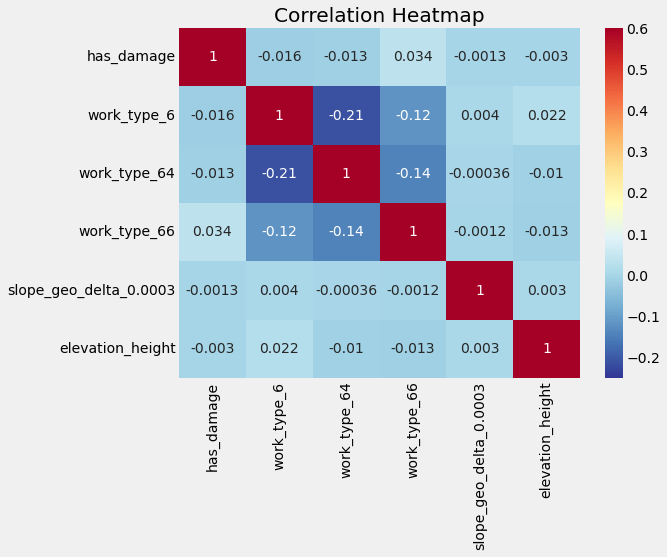

In [123]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_sub_corr_data, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Model Building

In [158]:
# baseline without feature engineering
# split data into test and train 
from sklearn.model_selection import train_test_split
org_train, org_test = train_test_split(data, test_size=0.3)

In [160]:
# remove date
train_data = org_train[['work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'work_type_5', 'work_type_6', 'work_type_7',
       'work_type_8', 'work_type_9', 'work_type_10', 'work_type_11',
       'work_type_12', 'work_type_13', 'work_type_14', 'work_type_15',
       'work_type_16', 'work_type_17', 'work_type_18', 'work_type_19',
       'work_type_20', 'work_type_21', 'work_type_22', 'work_type_23',
       'work_type_24', 'work_type_25', 'work_type_26', 'work_type_27',
       'work_type_28', 'work_type_29', 'work_type_30', 'work_type_31',
       'work_type_32', 'work_type_33', 'work_type_34', 'work_type_35',
       'work_type_36', 'work_type_37', 'work_type_38', 'work_type_39',
       'work_type_40', 'work_type_41', 'work_type_42', 'work_type_43',
       'work_type_44', 'work_type_45', 'work_type_46', 'work_type_47',
       'work_type_48', 'work_type_49', 'work_type_50', 'work_type_51',
       'work_type_52', 'work_type_53', 'work_type_54', 'work_type_55',
       'work_type_56', 'work_type_57', 'work_type_58', 'work_type_59',
       'work_type_60', 'work_type_61', 'work_type_62', 'work_type_63',
       'work_type_64', 'work_type_65', 'work_type_66', 'elevation_height',
       'slope_geo_delta_0.0003', 'is_large_project']]

In [161]:
test_data = org_test[['work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'work_type_5', 'work_type_6', 'work_type_7',
       'work_type_8', 'work_type_9', 'work_type_10', 'work_type_11',
       'work_type_12', 'work_type_13', 'work_type_14', 'work_type_15',
       'work_type_16', 'work_type_17', 'work_type_18', 'work_type_19',
       'work_type_20', 'work_type_21', 'work_type_22', 'work_type_23',
       'work_type_24', 'work_type_25', 'work_type_26', 'work_type_27',
       'work_type_28', 'work_type_29', 'work_type_30', 'work_type_31',
       'work_type_32', 'work_type_33', 'work_type_34', 'work_type_35',
       'work_type_36', 'work_type_37', 'work_type_38', 'work_type_39',
       'work_type_40', 'work_type_41', 'work_type_42', 'work_type_43',
       'work_type_44', 'work_type_45', 'work_type_46', 'work_type_47',
       'work_type_48', 'work_type_49', 'work_type_50', 'work_type_51',
       'work_type_52', 'work_type_53', 'work_type_54', 'work_type_55',
       'work_type_56', 'work_type_57', 'work_type_58', 'work_type_59',
       'work_type_60', 'work_type_61', 'work_type_62', 'work_type_63',
       'work_type_64', 'work_type_65', 'work_type_66', 'elevation_height',
       'slope_geo_delta_0.0003', 'is_large_project']]

In [163]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the has_damage from the training data
if 'has_damage' in train_data:
    train = train_data.drop(columns = ['has_damage'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_data)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (2408949, 70)
Testing data shape:  (1032407, 70)


In [164]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [165]:
train_labels = org_train['has_damage']
test_labels = [row['has_damage'] for index,row in org_test[['has_damage']].iterrows()]

In [166]:
test_labels = np.array(test_labels)

In [167]:
test_labels.shape

(1032407,)

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)
# Train on the training data
log_reg.fit(train, train_labels)
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [201]:
pred_labels = log_reg.predict(test)

### Evaluation
Classifier Evaluation Metrics can be classified under below categories
- Threshold
- Ranking
- Probability


# Threshold Based Evaluation

### Accuracy
Below we can see a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class.


In [174]:
score = log_reg.score(test, test_labels)
print(score)

0.9977925372454856


### Confusion Matrix 

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[1,0])
print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1030128       0]
 [   2279       0]]

True Positives(TP) =  0

True Negatives(TN) =  1030128

False Positives(FP) =  2279

False Negatives(FN) =  0


### Precision Recall F1 score

Precision summarizes the fraction of examples assigned the positive class that belong to the positive class

TruePositive / (TruePositive + FalsePositive)

Recall summarizes how well the positive class was predicted and is the same calculation as sensitivit

TruePositive / (TruePositive + FalseNegative)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1030128
           1       0.00      0.00      0.00      2279

    accuracy                           1.00   1032407
   macro avg       0.50      0.50      0.50   1032407
weighted avg       1.00      1.00      1.00   1032407



Using threshold based matric we can see precison,recall and F1 score provide a better estimate as Precision summarizes the fraction of examples assigned the positive class that belong to the positive class and Recall summarizes how well the positive class was predicted and is the same calculation as sensitivity.





#### It can be seen the model is classifying majority negative class without any damage

In [155]:
# split data into test and train 
from sklearn.model_selection import train_test_split
org_train, org_test = train_test_split(data_final, test_size=0.2)

In [156]:
train_data = org_train.copy()
test_data = org_test.copy()

# Ranking Based Evaluation

These metrics require that a classifier predicts a score or a probability of class membership.

### ROC AUC
The area under the ROC curve can be calculated and provides a single score to summarize the plot that can be used to compare models.
A no skill classifier will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.

In [202]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test))]
ns_auc = roc_auc_score(test_labels, ns_probs)
lr_auc = roc_auc_score(test_labels, log_reg_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


In [183]:
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(test_labels, log_reg_pred )
lr_f1, lr_auc = f1_score(test_labels,y_pred), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.000 auc=0.008


Here it can be seen the values are tiny  because of skewness in class. The False positive rate tends to stay at a small values due to the large numbers of negatives (i.e. making the denominator large).

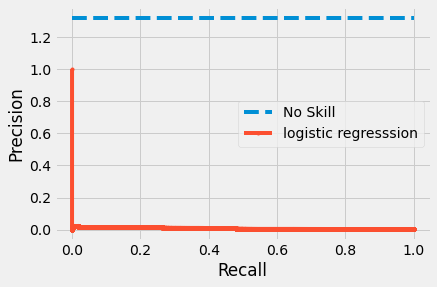

In [185]:
import sklearn.model_selection as model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
no_skill = len(test[test==1])/len(test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='logistic regresssion')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Here the model is performing  worse than low skill model

# Probability Based Evaluation

Probabilistic metrics are designed specifically to quantify the uncertainty in a classifier’s predictions. Where providing the right labels in that important. 

### LogLoss 
Log Loss is the negative average of the log of corrected predicted probabilities for each example

In [188]:
from sklearn.metrics import log_loss
logloss = log_loss(test_labels, pred_labels)
print(logloss)

0.07624306247826919


Even though the score is low it is not correctly classifying as majority class is negative

### Brier score
The Brier score is calculated as the mean squared error between the expected probabilities

In [189]:
from sklearn.metrics import brier_score_loss
brierScore = brier_score_loss(test_labels, pred_labels)
print(brierScore)

0.0022074627545144504


We can Brie Score is close to Logloss value. Although popular for balanced classification problems, probability scoring methods are less widely used for classification problems with a skewed class distribution.

# Model Improvments

###  Weighted logistic regression  for imbalanced class

In [276]:
data.groupby(['has_damage']).count()

,Unnamed: 0,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,...,work_type_62,work_type_63,work_type_64,work_type_65,work_type_66,ticket_datetime,elevation_height,slope_geo_delta_0.0003,is_large_project,elevation_angle
has_damage,,,,,,,,,,,,,,,,,,,,,
0,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916,...,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916,3433916
1,7440,7440,7440,7440,7440,7440,7440,7440,7440,7440,...,7440,7440,7440,7440,7440,7440,7440,7440,7440,7440


In [192]:
# ratio between positive and negative class
w = 7440/(7440+3433916)
w

0.002161938491687579

In [193]:
# higher weight to minority class and lower weight to majority clss
weights = {0:0.002, 1:10.0}

In [203]:
# Make the model with the specified regularization parameter

log_reg = LogisticRegression(C = 0.0001,class_weight=weights)
# Train on the training data
log_reg.fit(train, train_labels)
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [204]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test))]
ns_auc = roc_auc_score(test_labels, ns_probs)
lr_auc = roc_auc_score(test_labels, log_reg_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.762


In [205]:
lr_precision, lr_recall, _ = precision_recall_curve(test_labels, log_reg_pred )
lr_f1, lr_auc = f1_score(test_labels,y_pred), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.000 auc=0.008


We do not see  any difference model score with adding weights

## Using cross validation

In [375]:
train_train = data[['work_type_0', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'work_type_5', 'work_type_6',
       'work_type_7', 'work_type_8', 'work_type_9', 'work_type_10',
       'work_type_11', 'work_type_12', 'work_type_13', 'work_type_14',
       'work_type_15', 'work_type_16', 'work_type_17', 'work_type_18',
       'work_type_19', 'work_type_20', 'work_type_21', 'work_type_22',
       'work_type_23', 'work_type_24', 'work_type_25', 'work_type_26',
       'work_type_27', 'work_type_28', 'work_type_29', 'work_type_30',
       'work_type_31', 'work_type_32', 'work_type_33', 'work_type_34',
       'work_type_35', 'work_type_36', 'work_type_37', 'work_type_38',
       'work_type_39', 'work_type_40', 'work_type_41', 'work_type_42',
       'work_type_43', 'work_type_44', 'work_type_45', 'work_type_46',
       'work_type_47', 'work_type_48', 'work_type_49', 'work_type_50',
       'work_type_51', 'work_type_52', 'work_type_53', 'work_type_54',
       'work_type_55', 'work_type_56', 'work_type_57', 'work_type_58',
       'work_type_59', 'work_type_60', 'work_type_61', 'work_type_62',
       'work_type_63', 'work_type_64', 'work_type_65', 'work_type_66',
        'elevation_height', 'slope_geo_delta_0.0003',
       'is_large_project', 'has_damage']].copy()

In [376]:
y = [row['has_damage'] for index,row in train_train[['has_damage']].iterrows()]
y = np.array(y)

In [377]:
from sklearn.preprocessing import MinMaxScaler


# Drop the has_damage from the training data
if 'has_damage' in train_train:
    X = train_train.drop(columns = ['has_damage'])
else:
    X = train_train.copy()
    
# Feature names
features = list(X.columns)



# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X)

# Transform both training and testing data
train = imputer.transform(X)


# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)


print('data shape: ', X.shape)


data shape:  (3441356, 70)


In [220]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.model_selection as model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


model =  LogisticRegression(solver='lbfgs',C = 0.0001,class_weight=weights)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            'roc_auc'  : make_scorer(roc_auc_score),
           }
results = model_selection.cross_validate(estimator=model,
                                          X=X,
                                          y=y,
                                          cv=5,
                                          scoring=scoring)

In [224]:
print('Mean Accuracy: %.3f' % mean(results['test_accuracy']))
print('Mean Precision: %.3f' % mean(results['test_precision']))
print('Mean Recall: %.3f' % mean(results['test_recall']))
print('Mean F1 score : %.3f' % mean(results['test_f1_score']))
print('Mean ROC_AUC: %.3f' % mean(results['test_roc_auc']))


Mean Accuracy: 0.002
Mean Precision: 0.002
Mean Recall: 1.000
Mean F1 score : 0.004
Mean ROC_AUC: 0.500


In [222]:
results

{'fit_time': array([8.70874715, 7.67734599, 7.5088203 , 7.94550586, 7.03832889]),
 'score_time': array([1.06750512, 0.92636919, 0.9481988 , 1.44485402, 0.986444  ]),
 'test_accuracy': array([0.00216194, 0.00216194, 0.00216194, 0.00216194, 0.00216194]),
 'test_precision': array([0.00216194, 0.00216194, 0.00216194, 0.00216194, 0.00216194]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_f1_score': array([0.00431454, 0.00431455, 0.00431455, 0.00431455, 0.00431455]),
 'test_roc_auc': array([0.5, 0.5, 0.5, 0.5, 0.5])}

# Using a better model
The gradient boosting machine using the LightGBM library! The Gradient Boosting Machine. This ML algorithm better handels skewed datasets

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [226]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [229]:
# predict the results
y_pred=clf.predict(X_test)

In [230]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9976


In [231]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9977
Test set score: 0.9976


In [235]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))

Logistic: f1=0.000 auc=0.010


In [379]:
X_train.shape

(2408949, 70)

In [380]:
y_train.shape

(2408949,)

In [381]:
X_test.shape

(1032407, 70)

In [383]:
# Better parameter
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary'
                                 , learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.5, n_jobs = -1, random_state = 50)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=1000, objective='binary',
               random_state=50, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5)

In [385]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))

Logistic: f1=0.001 auc=0.012


In [295]:
from sklearn.model_selection import train_test_split
org_train, org_test = train_test_split(data, test_size=0.3)

# Using New Features and UP Sampling

In [332]:
from sklearn.utils import resample,shuffle
df_majority = data.loc[data['has_damage'] == 0].copy()
df_minority = data.loc[data['has_damage'] == 1].copy()
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=3433916,  # to match majority class
                             random_state=123)  # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print(df_upsampled.has_damage.value_counts())

0    3433916
1    3433916
Name: has_damage, dtype: int64


In [333]:
df_upsampled = df_upsampled[['work_type_0', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'work_type_5', 'work_type_6',
       'work_type_7', 'work_type_8', 'work_type_9', 'work_type_10',
       'work_type_11', 'work_type_12', 'work_type_13', 'work_type_14',
       'work_type_15', 'work_type_16', 'work_type_17', 'work_type_18',
       'work_type_19', 'work_type_20', 'work_type_21', 'work_type_22',
       'work_type_23', 'work_type_24', 'work_type_25', 'work_type_26',
       'work_type_27', 'work_type_28', 'work_type_29', 'work_type_30',
       'work_type_31', 'work_type_32', 'work_type_33', 'work_type_34',
       'work_type_35', 'work_type_36', 'work_type_37', 'work_type_38',
       'work_type_39', 'work_type_40', 'work_type_41', 'work_type_42',
       'work_type_43', 'work_type_44', 'work_type_45', 'work_type_46',
       'work_type_47', 'work_type_48', 'work_type_49', 'work_type_50',
       'work_type_51', 'work_type_52', 'work_type_53', 'work_type_54',
       'work_type_55', 'work_type_56', 'work_type_57', 'work_type_58',
       'work_type_59', 'work_type_60', 'work_type_61', 'work_type_62',
       'work_type_63', 'work_type_64', 'work_type_65', 'work_type_66','elevation_height', 'slope_geo_delta_0.0003',
       'is_large_project', 'has_damage']]

In [334]:
y = [row['has_damage'] for index,row in df_upsampled[['has_damage']].iterrows()]
y = np.array(y)

In [335]:
y.shape

(6867832,)

In [337]:
df_upsampled.shape

(6867832, 71)

In [338]:
df_upsampled.head(5)

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,work_type_9,...,work_type_61,work_type_62,work_type_63,work_type_64,work_type_65,work_type_66,elevation_height,slope_geo_delta_0.0003,is_large_project,has_damage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,264,0.012744,False,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,289,0.012622,False,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,292,0.012429,False,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,207,0.012475,False,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,248,0.012572,False,0


In [339]:
data_final.head(5)

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,work_type_9,...,elevation_slope_range6,elevation_slope_range7,elevation_slope_range8,elevation_slope_range9,elevation_slope_range10,elevation_slope_range11,elevation_slope_range12,elevation_slope_range13,is_large_project,has_damage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0


In [340]:
from sklearn.preprocessing import MinMaxScaler


# Drop the has_damage from the training data
if 'has_damage' in df_upsampled:
    X = df_upsampled.drop(columns = ['has_damage'])
else:
    X = df_upsampled.copy()
    
# Feature names
features = list(X.columns)



# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X)

# Transform both training and testing data
train = imputer.transform(X)


# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)


print('data shape: ', X.shape)


data shape:  (6867832, 70)


In [364]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [342]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [343]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.749 auc=0.809


In [307]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.826 auc=0.862


In [ ]:
# improved parameters

In [350]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary'
                                 , learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.5, n_jobs = -1, random_state = 50)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=1000, objective='binary',
               random_state=50, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5)

In [369]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary'
                                 , learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.5, n_jobs = -1, random_state = 50)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=10000, objective='binary',
               random_state=50, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5)

In [370]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.967 auc=0.990


In [ ]:
#Overll all examples
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X)
y_prob = y_prob[:,1]
y_pred=clf.predict(X)


In [374]:
precision, recall, _ = precision_recall_curve(y, y_prob)
f1, auc = f1_score(y, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.967 auc=0.991


In [366]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.893 auc=0.934


In [351]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.819 auc=0.861


In [ ]:
# Using PCA to reduce dimensions

In [353]:
from sklearn.decomposition import PCA
X_reduced = X
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_reduced)


In [356]:
X_reduced = principalComponents
y_reduced = y
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size = 0.3, random_state = 0)

In [362]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=3000, objective = 'binary'
                                 , learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.5, n_jobs = -1, random_state = 50)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=3000, objective='binary',
               random_state=50, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5)

In [363]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.805 auc=0.864


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

In [326]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_test)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.864 auc=0.903


In [ ]:
Tesing on hidden set

In [327]:
y_expected = [row['has_damage'] for index,row in org_test[['has_damage']].iterrows()]
y_expected = np.array(y_expected)

In [329]:
X_expected =org_test[['work_type_0', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'work_type_5', 'work_type_6',
       'work_type_7', 'work_type_8', 'work_type_9', 'work_type_10',
       'work_type_11', 'work_type_12', 'work_type_13', 'work_type_14',
       'work_type_15', 'work_type_16', 'work_type_17', 'work_type_18',
       'work_type_19', 'work_type_20', 'work_type_21', 'work_type_22',
       'work_type_23', 'work_type_24', 'work_type_25', 'work_type_26',
       'work_type_27', 'work_type_28', 'work_type_29', 'work_type_30',
       'work_type_31', 'work_type_32', 'work_type_33', 'work_type_34',
       'work_type_35', 'work_type_36', 'work_type_37', 'work_type_38',
       'work_type_39', 'work_type_40', 'work_type_41', 'work_type_42',
       'work_type_43', 'work_type_44', 'work_type_45', 'work_type_46',
       'work_type_47', 'work_type_48', 'work_type_49', 'work_type_50',
       'work_type_51', 'work_type_52', 'work_type_53', 'work_type_54',
       'work_type_55', 'work_type_56', 'work_type_57', 'work_type_58',
       'work_type_59', 'work_type_60', 'work_type_61', 'work_type_62',
       'work_type_63', 'work_type_64', 'work_type_65', 'work_type_66','elevation_height', 'slope_geo_delta_0.0003',
       'is_large_project', 'has_damage']]

In [330]:
from sklearn.preprocessing import MinMaxScaler


# Drop the has_damage from the training data
if 'has_damage' in df_upsampled:
    X_expected = X_expected.drop(columns = ['has_damage'])
else:
    X_expected = X_expected.copy()
    
# Feature names
features = list(X_expected.columns)



# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_expected)

# Transform both training and testing data
train = imputer.transform(X_expected)


# Repeat with the scaler
scaler.fit(X_expected)
X_expected = scaler.transform(X_expected)


print('data shape: ', X_expected.shape)

data shape:  (1032407, 70)


In [331]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
y_prob=clf.predict_proba(X_expected)
y_prob = y_prob[:,1]
y_pred=clf.predict(X_expected)
precision, recall, _ = precision_recall_curve(y_expected, y_prob)
f1, auc = f1_score(y_expected, y_pred), auc(recall, precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (f1, auc))

gbm: f1=0.010 auc=0.008


#### Over sampling minority group

In [238]:
from sklearn.utils import resample,shuffle
df_majority = data_final.loc[data_final['has_damage'] == 0].copy()
df_minority = data_final.loc[data_final['has_damage'] == 1].copy()
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=3433916,  # to match majority class
                             random_state=123)  # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print(df_upsampled.has_damage.value_counts())

0    3433916
1    3433916
Name: has_damage, dtype: int64


In [280]:
df_upsampled.shape

(6867832, 98)

In [240]:
y = [row['has_damage'] for index,row in df_upsampled[['has_damage']].iterrows()]
y = np.array(y)

In [278]:
from sklearn.preprocessing import MinMaxScaler


# Drop the has_damage from the training data
if 'has_damage' in df_upsampled:
    X = df_upsampled.drop(columns = ['has_damage'])
else:
    X = df_upsampled.copy()
    
# Feature names
features = list(X.columns)



# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X)

# Transform both training and testing data
train = imputer.transform(X)


# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)


print('data shape: ', X.shape)


data shape:  (6867832, 97)


In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [261]:
X_test.shape

(1373567, 97)

In [245]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
clf.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [275]:
results

{'fit_time': array([8.70874715, 7.67734599, 7.5088203 , 7.94550586, 7.03832889]),
 'score_time': array([1.06750512, 0.92636919, 0.9481988 , 1.44485402, 0.986444  ]),
 'test_accuracy': array([0.00216194, 0.00216194, 0.00216194, 0.00216194, 0.00216194]),
 'test_precision': array([0.00216194, 0.00216194, 0.00216194, 0.00216194, 0.00216194]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_f1_score': array([0.00431454, 0.00431455, 0.00431455, 0.00431455, 0.00431455]),
 'test_roc_auc': array([0.5, 0.5, 0.5, 0.5, 0.5])}

In [246]:
# predict the results
y_pred=clf.predict(X_test)

In [269]:
y_pred_prob = clf.predict_proba(X_test)

In [271]:
y_pred_prob.shape

(1373567, 2)

In [251]:
# predict the results
y_pred_prob = clf.predict_proba(X_test)

<AxesSubplot:>

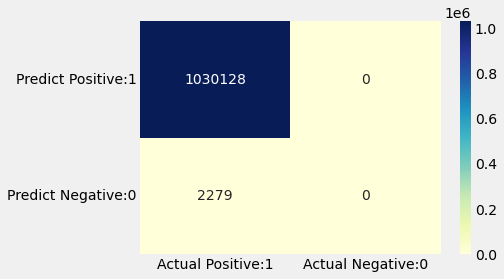

In [252]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [253]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    685726
           1       0.94      1.00      0.97    687841

    accuracy                           0.97   1373567
   macro avg       0.97      0.96      0.96   1373567
weighted avg       0.97      0.97      0.96   1373567



In [256]:
y_prob.shape

(1032407,)